<a href="https://colab.research.google.com/github/Shivakumar-DS/NPN/blob/master/Diabetes_Prediction_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: agg


In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/npntraining/sample-datasets/master/diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
data.shape

(768, 9)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [16]:
diabetes_data = data.copy(deep = True) # creating the copy of the dataset
# replacing the 0 values with Nan
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


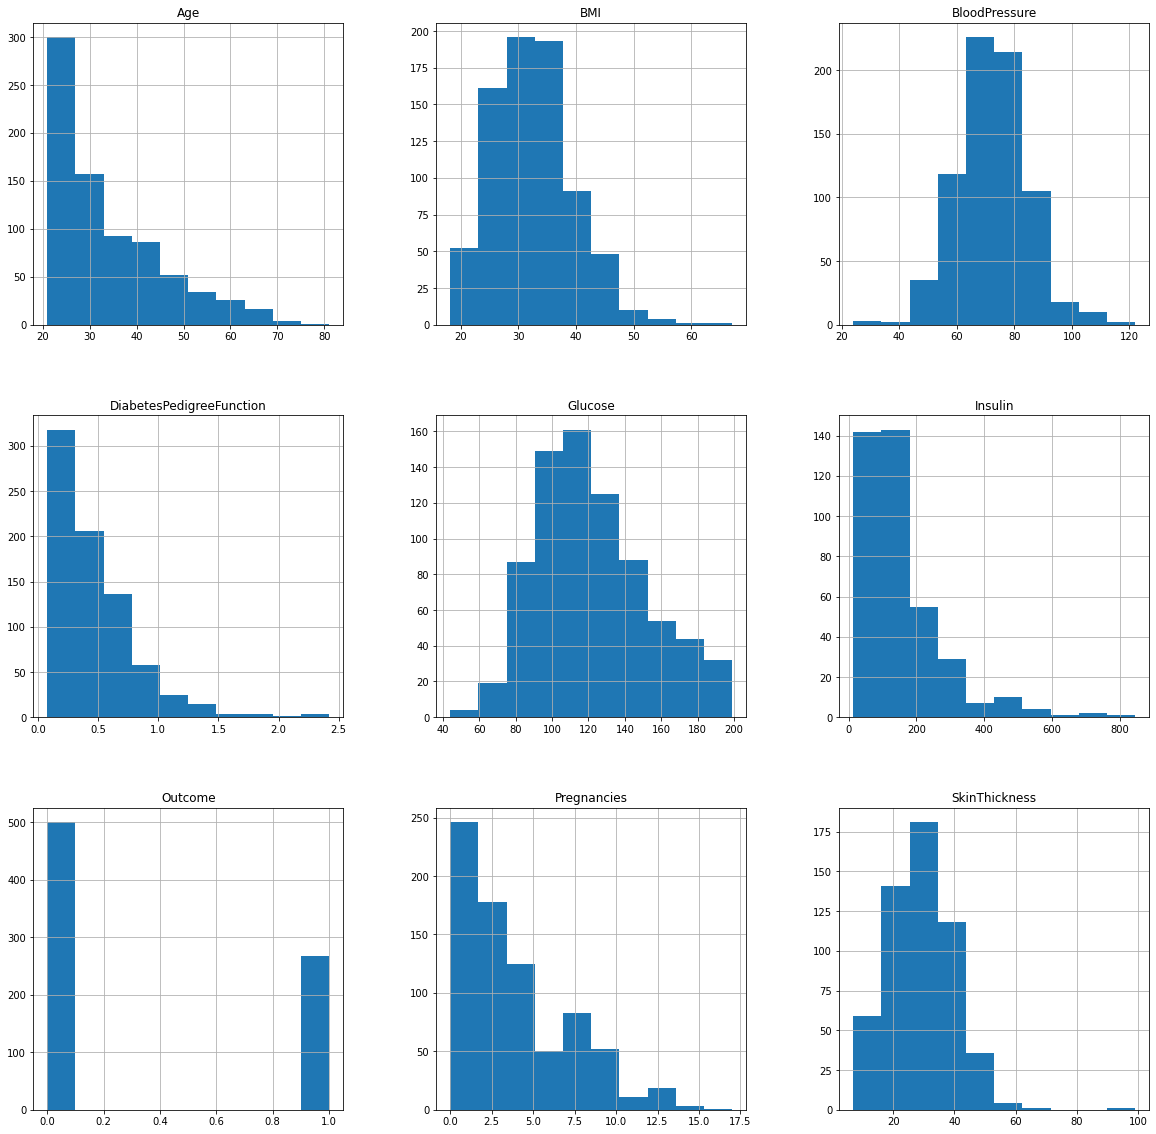

In [17]:
p = diabetes_data.hist(figsize = (20,20))

In [19]:
def fillna_with_mean(data):
  columns = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
  for col in columns:
    diabetes_data[col].fillna(diabetes_data[col].mean(), inplace = True)
diabetes_data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
fillna_with_mean(diabetes_data)
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

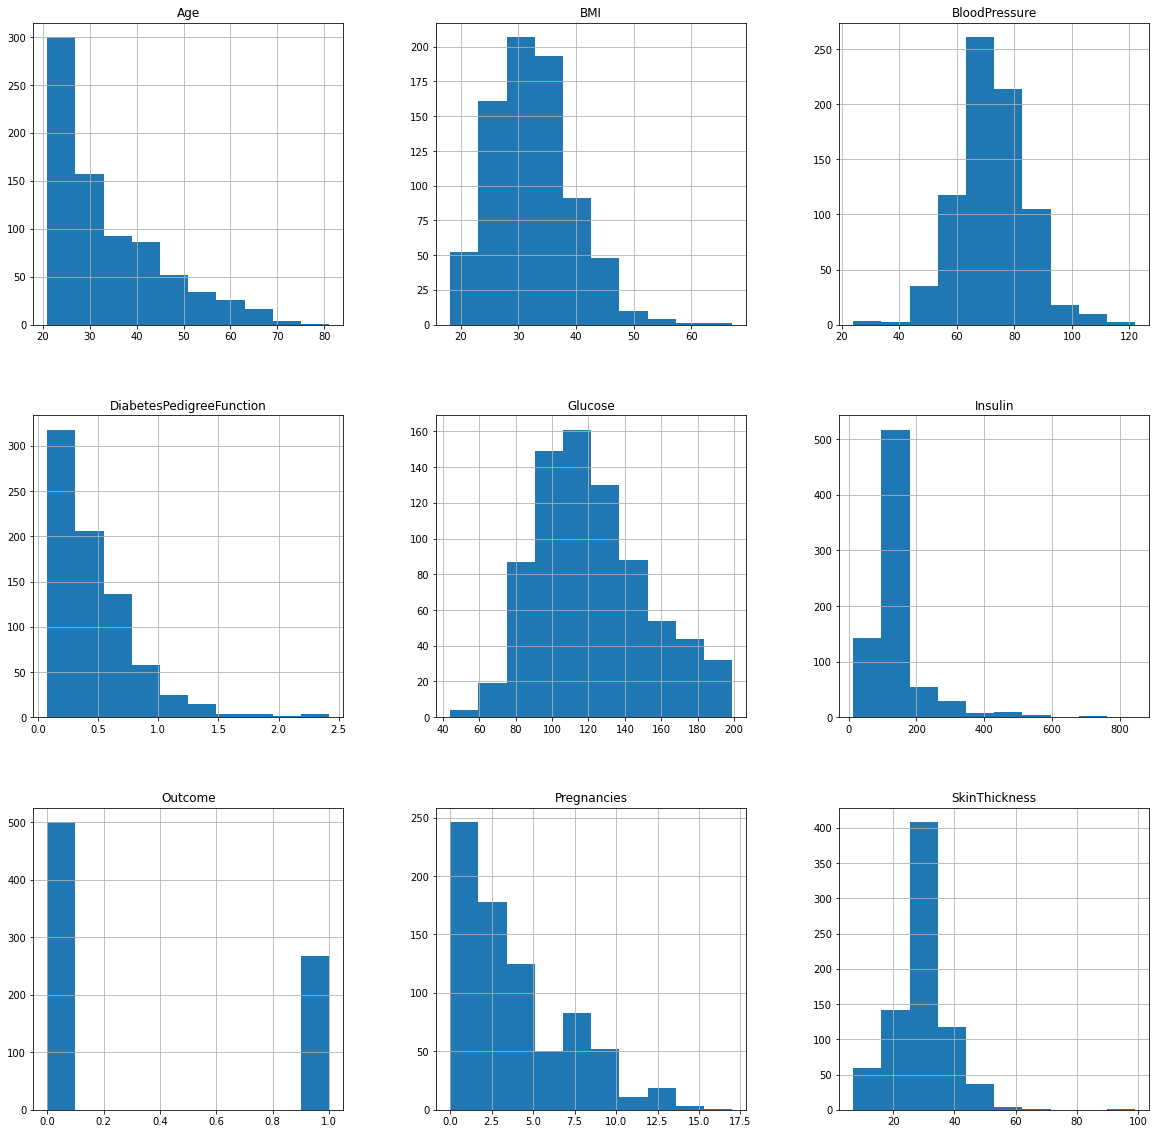

In [22]:
#Plotting after nan removal
p = diabetes_data.hist(figsize = (20,20))

0    500
1    268
Name: Outcome, dtype: int64


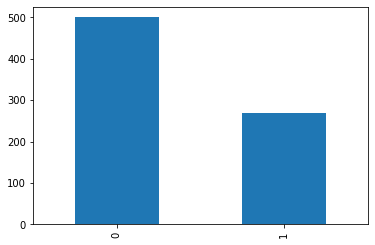

In [24]:
#Checking distribution of dependent variable, Outcome and plotting it
print(diabetes_data.Outcome.value_counts())
p=diabetes_data.Outcome.value_counts().plot(kind="bar")
#Out of 768 data points, 500 are labeled as 0 and 268 as 1.

#Do correlation analysis and bivariate visualization with Insights
Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.


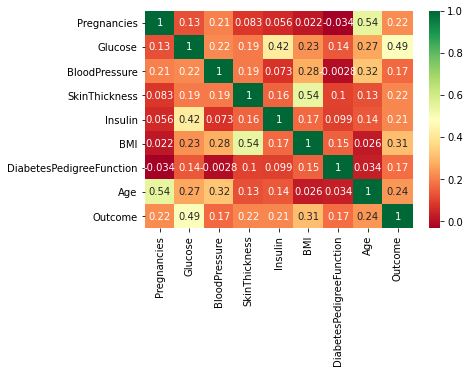

In [30]:
#plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

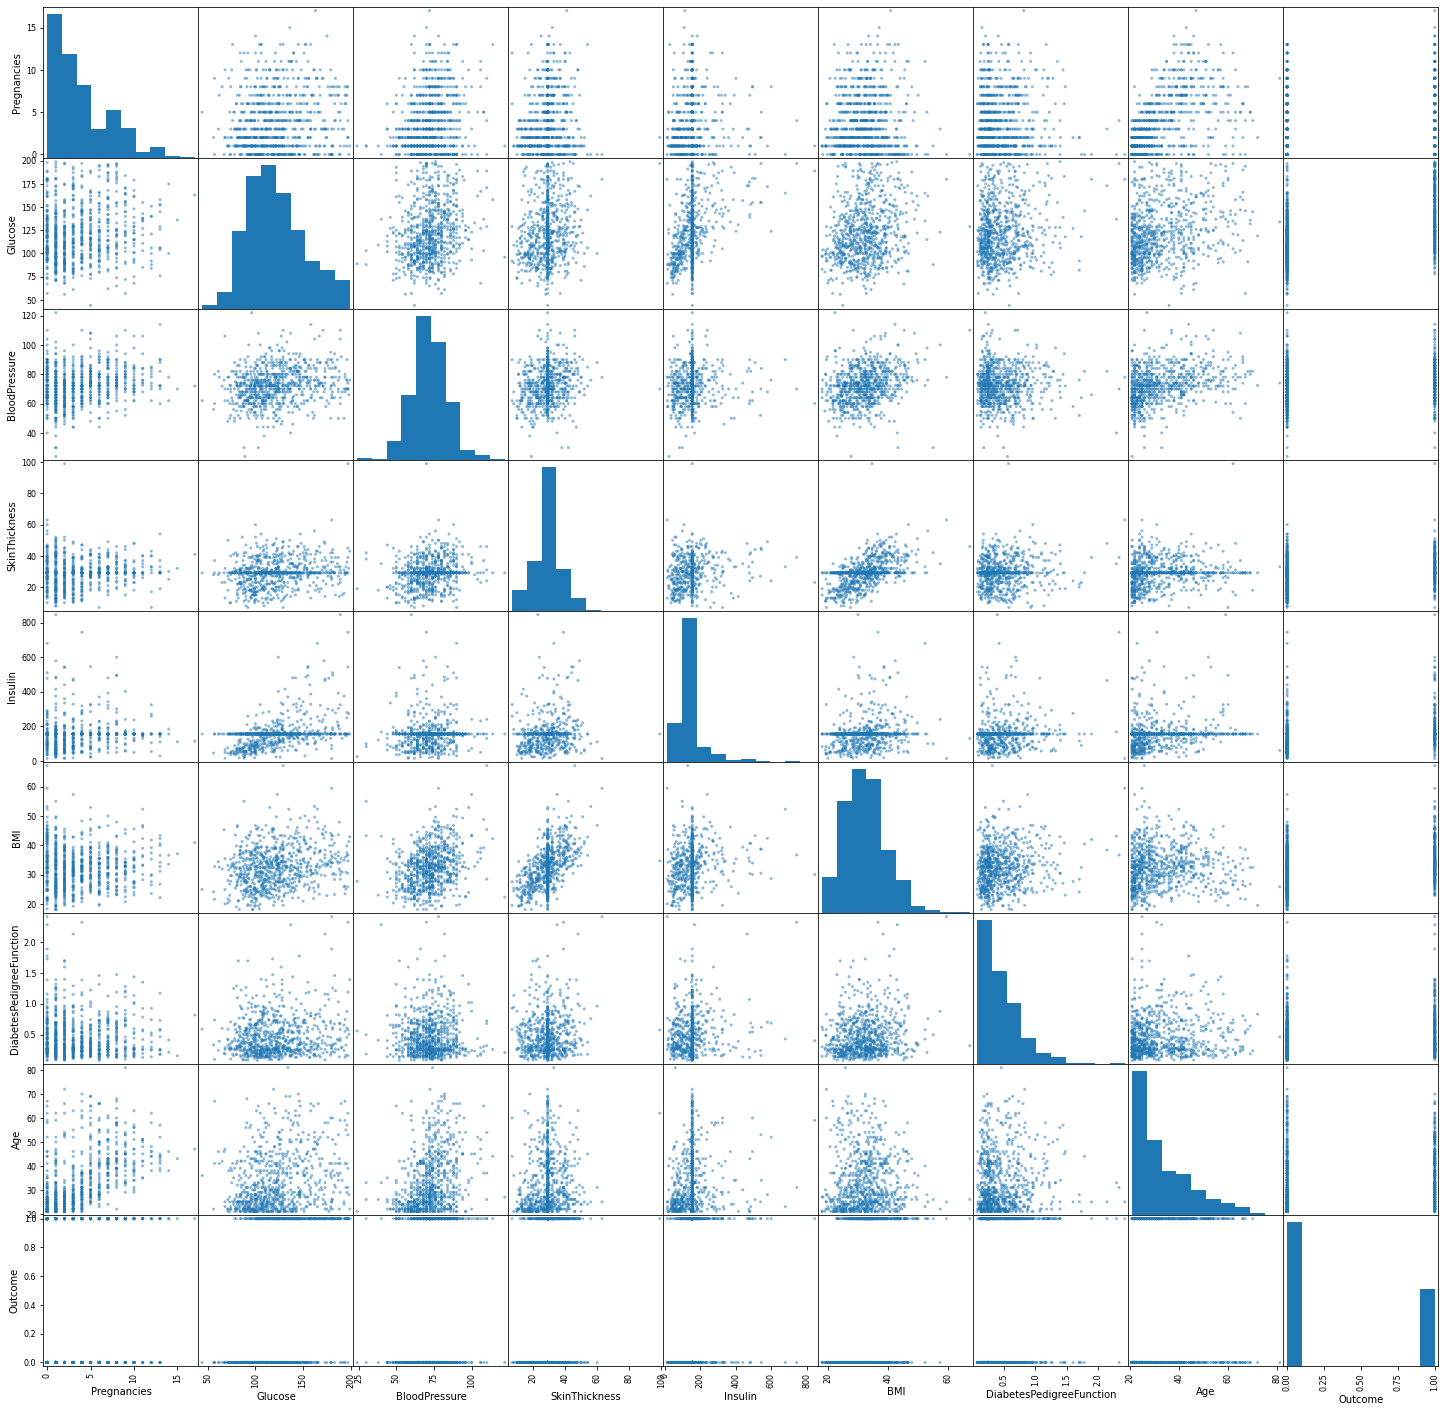

In [26]:
#Plotting a scatter Matrix
p=scatter_matrix(diabetes_data,figsize=(25, 25))

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.
For Reference: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

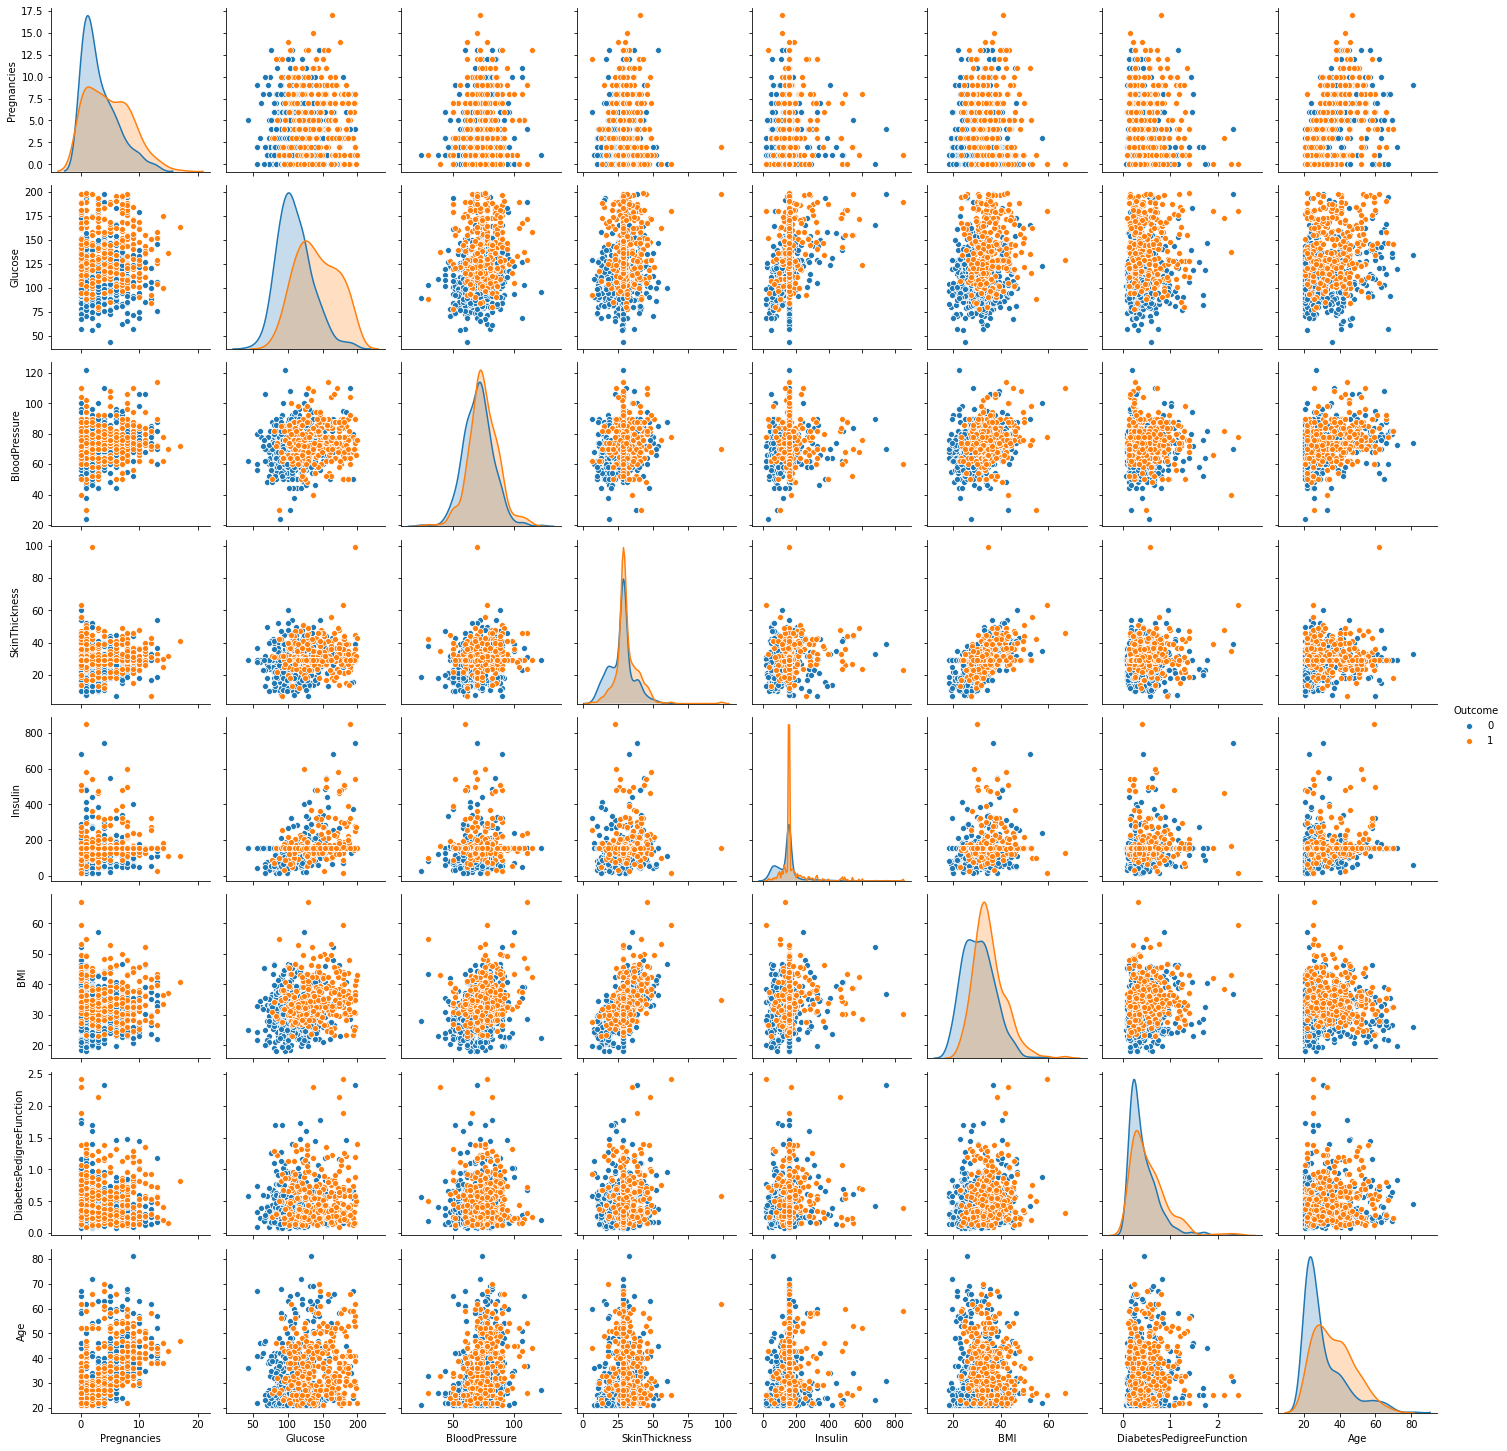

In [28]:
p=sns.pairplot(diabetes_data, hue = 'Outcome')

Data Preparation
1. Do train and test split with stratify sampling on Outcome variable to maintain the
distribution of dependent variable

About Stratify : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [35]:
features = diabetes_data.drop('Outcome',axis=1)
target = diabetes_data['Outcome']

In [37]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42, stratify=target)

In [39]:
X_train.shape

(537, 8)

In [40]:
X_test.shape

(231, 8)

Model Building
1. Train Support Vector Machine Model
2. Scale the data points using MinMaxScaler
3. Fit SVM Model on Scale data and give your observation
4. Try improving the model accuracy using C=1000
Note : Increasing C allows us to improve the model, resulting in 81.2% train set accuracy.

In [45]:
#Scaling the data using MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(diabetes_data)
print(min_max_scaler.data_max_)
min_max_scaler.transform(diabetes_data)

[ 17.   199.   122.    99.   846.    67.1    2.42  81.     1.  ]


array([[0.35294118, 0.67096774, 0.48979592, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.07130658, 0.15      ,
        0.        ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.11571307, 0.43333333,
        1.        ],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.10119556, 0.03333333,
        0.        ]])

In [70]:
model = SVC(probability=True)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7402597402597403

Regularization (C)

In [85]:
model_C = SVC(C=1000,probability=True)
model_C.fit(X_train,y_train)
model_C.score(X_test,y_test)

0.7316017316017316

In [53]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test,y_test)

0.7229437229437229

In [73]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
#let us get the predictions using the classifier we had fit above. Creating the confusion Matrix
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [59]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,135,15,150
1,45,36,81
All,180,51,231


In [57]:
y_pred_model_C = model_C.predict(X_test)
y_pred_model_C

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [60]:
confusion_matrix(y_test,y_pred_model_C)
pd.crosstab(y_test, y_pred_model_C, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,129,21,150
1,41,40,81
All,170,61,231


In [58]:
y_pred_model_linear = model_linear_kernal.predict(X_test)
y_pred_model_linear

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [62]:
#To see the metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       150
           1       0.71      0.44      0.55        81

    accuracy                           0.74       231
   macro avg       0.73      0.67      0.68       231
weighted avg       0.73      0.74      0.72       231



In [63]:
#To see the metrics of model_C
print(classification_report(y_test,y_pred_model_C))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       150
           1       0.66      0.49      0.56        81

    accuracy                           0.73       231
   macro avg       0.71      0.68      0.68       231
weighted avg       0.72      0.73      0.72       231



In [64]:
#To see the metrics of model_C
print(classification_report(y_test,y_pred_model_linear))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       150
           1       0.64      0.47      0.54        81

    accuracy                           0.72       231
   macro avg       0.70      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231



ROC - AUC
ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

In [71]:
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba

array([0.24959445, 0.19515306, 0.64642393, 0.62407043, 0.3304823 ,
       0.11377973, 0.76161118, 0.16213802, 0.10763622, 0.25923578,
       0.12895692, 0.17836556, 0.12230455, 0.51607108, 0.84792005,
       0.941683  , 0.46136297, 0.52429624, 0.52076582, 0.43147874,
       0.22299234, 0.50908072, 0.09634029, 0.11088263, 0.77985872,
       0.45347921, 0.3850979 , 0.33017675, 0.09688653, 0.1694852 ,
       0.64635973, 0.51185514, 0.14503208, 0.09081073, 0.55850776,
       0.71973848, 0.12009286, 0.46314494, 0.19284851, 0.22461728,
       0.11591977, 0.89943478, 0.10848695, 0.13229292, 0.13998795,
       0.58739162, 0.2797718 , 0.85433481, 0.12654451, 0.11288932,
       0.29626801, 0.24714699, 0.72797021, 0.07378639, 0.48029308,
       0.26086516, 0.09498214, 0.94363404, 0.20758458, 0.28673069,
       0.09558272, 0.16790059, 0.38978575, 0.39200355, 0.0642527 ,
       0.17019224, 0.3007172 , 0.21844506, 0.18063142, 0.47554964,
       0.8869584 , 0.22118588, 0.06142471, 0.09424854, 0.14348

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print('FPR')
print(fpr)
print('TPR')
print(tpr)
print('Thresholds')
print(thresholds)

FPR
[0.         0.         0.         0.00666667 0.00666667 0.01333333
 0.01333333 0.02       0.02       0.03333333 0.03333333 0.04666667
 0.04666667 0.06666667 0.06666667 0.07333333 0.07333333 0.08666667
 0.08666667 0.09333333 0.09333333 0.13333333 0.13333333 0.14666667
 0.14666667 0.15333333 0.15333333 0.16       0.16       0.2
 0.2        0.20666667 0.20666667 0.21333333 0.21333333 0.22666667
 0.22666667 0.23333333 0.23333333 0.24666667 0.24666667 0.25333333
 0.25333333 0.27333333 0.27333333 0.28       0.28       0.3
 0.3        0.30666667 0.30666667 0.31333333 0.31333333 0.32666667
 0.32666667 0.33333333 0.33333333 0.36       0.36       0.38
 0.38       0.38666667 0.38666667 0.39333333 0.39333333 0.41333333
 0.41333333 0.42       0.42       0.43333333 0.43333333 0.44
 0.44       0.58666667 0.58666667 0.59333333 0.59333333 0.86
 0.86       1.        ]
TPR
[0.         0.01234568 0.04938272 0.04938272 0.09876543 0.09876543
 0.13580247 0.13580247 0.19753086 0.19753086 0.22222222 0.2222

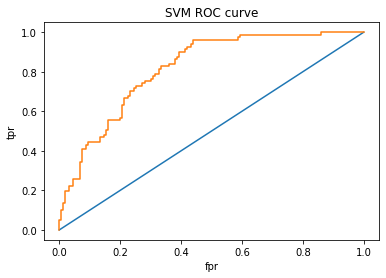

In [82]:
# Plotting the ROC Curve
auc = roc_auc_score
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr, label='roc_auc_curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('SVM ROC curve')
plt.show()

In [83]:
#Area under ROC curve
roc_auc_score(y_test,y_pred_proba)

0.81679012345679

In [86]:
y_pred_proba_modelC = model_C.predict_proba(X_test)[:,1]
y_pred_proba_modelC

array([0.23675854, 0.24800853, 0.62816466, 0.6311192 , 0.48116582,
       0.18398161, 0.58103802, 0.17651957, 0.15416216, 0.373232  ,
       0.21856264, 0.13044734, 0.19235504, 0.43884848, 0.71341733,
       0.85153982, 0.50879664, 0.24630628, 0.17683257, 0.26642409,
       0.31317043, 0.36385885, 0.10532501, 0.16924324, 0.48069171,
       0.38204387, 0.33888714, 0.31620459, 0.08079522, 0.20815911,
       0.68436233, 0.41444561, 0.22851822, 0.17800678, 0.07470867,
       0.68999959, 0.22078292, 0.45641349, 0.44187305, 0.36841594,
       0.19280318, 0.77997743, 0.08503281, 0.22385819, 0.16926164,
       0.19617047, 0.3185701 , 0.72833145, 0.14903576, 0.11595993,
       0.31208962, 0.28087722, 0.68348642, 0.09332863, 0.638807  ,
       0.22677919, 0.23436214, 0.6302251 , 0.30003825, 0.31086866,
       0.1032961 , 0.28856454, 0.38569744, 0.34941705, 0.11455845,
       0.19359264, 0.23185823, 0.23591301, 0.21878704, 0.30337929,
       0.84424829, 0.55772112, 0.06088542, 0.10617937, 0.12635

In [87]:
fpr_c, tpr_c, thresholds_c = roc_curve(y_test, y_pred_proba_modelC)

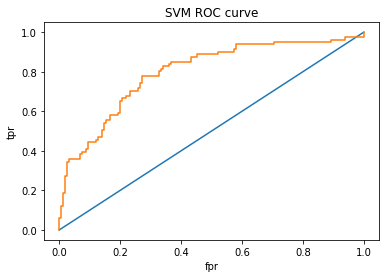

In [88]:
# Plotting the ROC Curve
plt.plot([0,1],[0,1])
plt.plot(fpr_c,tpr_c, label='roc_auc_curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('SVM ROC curve')
plt.show()

In [89]:
#Area under ROC curve
roc_auc_score(y_test,y_pred_proba_modelC)

0.7967078189300411